## STAT 207 Lab 8: Multiple Regression and ANOVA

Due: Wednesday, April 1, 23:59:59

### Michael Cao AND minhcao2 

This lab consists of three main parts. It builds on material covered in 10_anova.

### Part 1: US melanoma data (6 pts)

The lab_08 folder includes the data file, "USmelanoma.csv". It contains information on the following variables for 48 states and the District of Columbia:

    mortality: number of white males died due to malignant melanoma 1950-1969 
    per one million inhabitants.

    latitude: latitude of the geographic center of the state (in degrees north).

    longitude: longitude of the geographic center of each state (in degrees east).

    ocean: a binary variable indicating bordering on an ocean (1=yes, 0=no).

**a) (1 pt)** Read the data into a pandas data frame. Display the first 10 rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
df = pd.read_csv("USmelanoma.csv")
df.head(n = 10
       )

,state,mortality,latitude,longitude,ocean
0,Alabama,219,33.0,-87.0,1
1,Arizona,160,34.5,-112.0,0
2,Arkansas,170,35.0,-92.5,0
3,California,182,37.5,-119.5,1
4,Colorado,149,39.0,-105.5,0
5,Connecticut,159,41.8,-72.8,1
6,Delaware,200,39.0,-75.5,1
7,District of Columbia,177,39.0,-77.0,0
8,Florida,197,28.0,-82.0,1
9,Georgia,214,33.0,-83.5,1


**b) (3 pts)** Visualizing the explanatory variables: Make a scatter plot with longitude on the x axis, latitude on the y axis. Color the points in the scatter plot with two different colors depending on whether or not the state borders an ocean. 

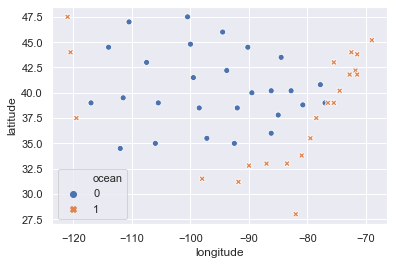

In [2]:
sns.scatterplot(x = "longitude", y = "latitude", style = "ocean", hue = "ocean", data = df)


**c) (2 pts)** Briefly explain why the scatter plot looks the way it does. Are there patterns you can explain?

"There arent any correlation between latitude and longitude"

### Part 2: Multiple regression model (9 pts)

In this part we investigate the model:

$$
\mbox{mortality} = b_0 + b_1 * \mbox{latitude} + b_2 * \mbox{longitude} + b_3 * \mbox{ocean} + \mbox{error}
$$

where $b_0$, $b_1$, $b_2$ and $b_3$ are unknown regression coefficients to be estimated.

**a) (3 pts)** Use python to fit the regression given above using ordinary least squares, and store the results. Display a summary of the model fit that includes the coefficient estimates, their standard errors, R-squared for the model, and the F-test statistic for the model. 

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
mod1 = smf.ols("mortality ~ latitude + longitude + ocean",
              data = df).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mortality   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     50.83
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           1.70e-14
Time:                        06:21:59   Log-Likelihood:                -204.75
No. Observations:                  49   AIC:                             417.5
Df Residuals:                      45   BIC:                             425.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.2369     27.060     12.906      0.000     294.736     403.738
latitude      -5.4950      0.529    -10.390      0.000      -6.560      -4.430
longitude     -0.1219      0.173     -0.704      0.485      -0.471       0.227
ocean         21.7976      5.226      4.171      0.000      11.271      32.324
==============================================================================
Omnibus:                        2.010   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                1.485
Skew:                           0.425   Prob(JB):                        0.476
Kurtosis:                       3.058   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**b) (2 pts)** Write down the null hypothesis, $H_0$, for the F-statistic reported in the summary of the results. Express the hypothesis in terms of the parameters $b_0$, $b_1$, $b_2$, and $b_3$. Is $H_0$ rejected at the level $\alpha=0.01$? 

"$H_0$ if $b_1$ = $b_2$ = $b_3$ = 0. Fail to reject $H_0$ at $\alpha=0.01$ "

**c) (2 pts)** For each of the three explanatory variables, state whether or not the coefficient is statistically significantly different from zero, at level $\alpha=0.05$, based on your results. Explain how you know.

Explanatory variables latitude, ocean are significantly different from zero because their p- value are 0). However, explanatory variable longitude has p - value = 0.45 > $\alpha=0.05$, so it is not significant

**d) (2 pts)** From the internet or other sources, find the latitude and longitude of Minneapolis, Minnesota. Note that "degrees west" is the same as "-degrees east". Give the values below, and use the model to compute the predicted mortality per million for Minnesota if the Minneapolis latitude and longitude were used to represent this state.

In [3]:
predict = 349.2369 + -5.4950*44.986656 + -0.1219*-93.258133

In [4]:
predict

113.40339169269996

### Part 3: Oneway anova model (10 pts)

The included file 'iris.csv' contains several measurements of the flowers of iris plants of three different species. Here is the original reference for the data.

Anderson, Edgar (1935). The irises of the Gaspe Peninsula, Bulletin of the American Iris Society, 59, 2–5.

**a) (1 pt)** Read the data into a data frame and display the first few rows.

In [6]:
df2 = pd.read_csv("iris.csv")
df2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**b) (2 pts)** Make boxplots to compare the distributions of SepalLength between the three species.

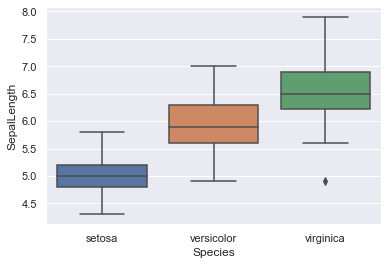

In [15]:
sns.boxplot(x = "Species", y = "SepalLength", data = df2)

**c) (3 pts)** Report the sample size, sample mean and sample standard deviation of SepalLength for each of the three species.

In [24]:
setosa = df2[df2["Species"] == "setosa"]
meanSetosa = setosa["SepalLength"].mean()
sdSetosa = setosa["SepalLength"].std()
sizeSetosa = len(setosa)
dfSetosa = pd.DataFrame({"mean":[meanSetosa], "sd":[sdSetosa],
                        "size":[sizeSetosa]})
dfSetosa

,mean,sd,size
0,5.006,0.35249,50


In [30]:
versicolor = df2[df2["Species"] == "versicolor"]
meanVersicolor = versicolor["SepalLength"].mean()
sdVersicolor = versicolor["SepalLength"].std()
sizeVersicolor = len(versicolor)
dfVersicolor = pd.DataFrame({"mean":[meanVersicolor],
                             "sd":[sdVersicolor],
                        "size":[sizeVersicolor]})
dfVersicolor

,mean,sd,size
0,5.936,0.516171,50


In [34]:
virginica = df2[df2["Species"] == "virginica"]
meanVirginica = virginica["SepalLength"].mean()
sdVirginica = virginica["SepalLength"].std()
sizeVirginica = len(virginica)
dfVirginica = pd.DataFrame({"mean":[meanVersicolor],
                             "sd":[sdVersicolor],
                        "size":[sizeVersicolor]})
dfVirginica

,mean,sd,size
0,5.936,0.516171,50


**d) (4 pts)** Compute an F test of the null hypothesis $H_0$ that the population mean SepalLength is the same for all three species. Does the test reject $H_0$ at the significance level 0.01?

In [40]:
mod = smf.ols("SepalLength ~ Species", data = df2).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SepalLength   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     119.3
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           1.67e-31
Time:                        09:02:27   Log-Likelihood:                -111.73
No. Observations:                 150   AIC:                             229.5
Df Residuals:                     147   BIC:                             238.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.0060      0.073     68.762      0.000       4.862       5.150
Species[T.versicolor]     0.9300      0.103      9.033      0.000       0.727       1.133
Species[T.virginica]      1.5820      0.103     15.366      0.000       1.379       1.785
==============================================================================
Omnibus:                        1.188   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                0.785
Skew:                           0.119   Prob(JB):                        0.675
Kurtosis:                       3.263   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F = 119.3, p < 0.001 => there are significant differences in mean Sepal Length between species.